# 100 Resilient Cities Internship Assignment

Will Geary (M.S. in Data Science, Columbia University)

[willgeary.github.io](http://willgeary.github.io/)

Click the button below to toggle code on/off.

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [524]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import re
import textwrap

%matplotlib inline

# Load the Data

In [157]:
def loadData(csvfile):
    
    # Load csv
    df = pd.read_csv(csvfile, skiprows=0, header=0)
    
    # Drop rows that are all NaN
    df = df.dropna(how='all')
    
    return df

In [158]:
northAmericaFileName = "NorthAmerica.csv"
asiaPacificFileName = "AsiaPacific.csv"

In [159]:
northAmerica = loadData(northAmericaFileName)
asiaPacific = loadData(asiaPacificFileName)

Preview the data.

In [160]:
print "North America preview:"
northAmerica.head()

North America


,Flagship Initiative?,Code,Sector 1,Sub-Sector 1,Action Area 1,Code.1,Sector 2,Sub-Sector 2,Action Area 2,Code.2,...,Initiative Status,Number of City Government Departments,Implementing Actor Type 1,Implementing Actor Type 2,Implementing Actor Type 3,Funding Source 1,Funding Source 2,Funding Source 3,Funding / Resource Secured?,Initiative Stage
0,No,e25,Cultural_Social_Services,Education,resilience_education,d26,Planning_Management,Public_Administration,public_engagement_outreach,e13,...,New_in_strategy,Four_five,Local_NGO,100RC_member_city,NaN,City_budget,NaN,NaN,Partially,Delivery
1,No,e13,Cultural_Social_Services,Arts_Culture,community_participation,d14,Planning_Management,Disaster_Risk_Management,emergency_preparedness_response,d12,...,Ongoing,Four_five,Local_NGO,100RC_member_city,Platform_partner_engagement,City_budget,Platform_partner_in_kind,NaN,Partially,Delivery
2,No,c11,Economy_Finance,Economic_Development,business_capacity_building,c12,Economy_Finance,Economic_Development,industry_market_assessment,NaN,...,New_in_strategy,One,Unknown,NaN,NaN,City_budget,NaN,NaN,No,Education_and_backgrounding
3,No,d14,Planning_Management,Disaster_Risk_Management,emergency_preparedness_response,d12,Planning_Management,Disaster_Risk_Management,disaster_response_recovery,c11,...,New_in_strategy,One,Private_sector,NaN,NaN,City_budget,NaN,NaN,No,Education_and_backgrounding
4,No,c11,Economy_Finance,Economic_Development,business_capacity_building,d12,Planning_Management,Disaster_Risk_Management,disaster_response_recovery,a24,...,New_in_strategy,One,Private_sector,NaN,NaN,City_budget,NaN,NaN,No,Education_and_backgrounding


In [161]:
print "Asia Pacific preview:"
asiaPacific.head()

Asia Pacific


,Flagship Initiative?,Code,Sector 1,Sub-Sector 1,Action Area 1,Code.1,Sector 2,Sub-Sector 2,Action Area 2,Code.2,...,Initiative Status,Number of City Government Departments,Implementing Actor Type 1,Implementing Actor Type 2,Implementing Actor Type 3,Funding Source 1,Funding Source 2,Funding Source 3,Funding / Resource Secured?,Initiative Stage
0,NaN,e36,Cultural_Social_Services,Equality_Equity,social_cohesion,e13,Cultural_Social_Services,Arts_Culture,community_participation,e32,...,Scalable_or_piloted,Six_or_more,None,NaN,NaN,City_budget,NaN,NaN,Partially,Delivery
1,NaN,e36,Cultural_Social_Services,Equality_Equity,social_cohesion,e25,Cultural_Social_Services,Education,resilience_education,e47,...,Preexisting_not_started,Two_three,Regional_government,Local_NGO,NaN,Federal_budget,NaN,NaN,Yes,Planning_and_feasibility
2,NaN,d31,Planning_Management,Urban_Planning,community_planning_urban_design,c13,Economy_Finance,Economic_Development,local_economic_planning,d26,...,Ongoing,Two_three,Regional_government,Private_sector,Local_NGO,City_budget,Regional_government_budget,NaN,Yes,Delivery
3,NaN,a34,Built_Infrastructure_ICT,Infrastructure,public_transit,a31,Built_Infrastructure_ICT,Infrastructure,cycling_pedestrian_infrastructure,d34,...,Preexisting_not_started,Four_five,Federal_government,Regional_government,Local_NGO,City_budget,Federal_budget,NaN,Yes,Diagnostic_research
4,NaN,e13,Cultural_Social_Services,Arts_Culture,community_participation,a13,Built_Infrastructure_ICT,Buildings,community_cultural_facilities,c14,...,Ongoing,Four_five,Local_NGO,Private_sector,NaN,City_budget,NaN,NaN,Yes,Planning_and_feasibility


# Process the Data

There are 5 unique sectors, 14 unique sub-sectors and 86 unique action areas in 100RC's naming taxonomy. Not all of them are necessarily used in a given set of initiatives, and some initiatives are marked 'NA' for any or all of these three fields.

Let's generate lists of all of the unique sectors, sub-sectors and action areas that are tagged in a given data set.

In [171]:
# Generate lists of all unique sectors, subsectors and action areas
def getUniqueSectors(df):
    uniques = np.unique(list(df['Sector 1']) + list(df['Sector 2']) + list(df['Sector 3']))
    return uniques

def getUniqueSubSectors(df):
    uniques = np.unique(list(df['Sub-Sector 1']) + list(df['Sub-Sector 2']) + list(df['Sub-Sector 3']))
    return uniques

def getUniqueActionAreas(df):
    uniques = np.unique(list(df['Action Area 1']) + list(df['Action Area 2']) + list(df['Action Area 3']))
    return uniques

1) Categorize initiative according to Sector. Note that a single initiative may be tagged with up to three sectors.

In [188]:
# Create a column for each Sector type. There are five Sector types in total.
# If an initiative is tagged with a Sector in either of the three Sector columns,
# Put a 1 in the appropriate Sector type column, otherwise put a 0
def categorizeBySector(df):
    # Get list of all unique sectors
    uniqueSectors = getUniqueSectors(df)
    
    df = df.copy()
    
    # Initialize sector columns with zeros
    for sector in uniqueSectors:
        df["Sector_"+sector] = 0
    
    # Update sector_ columns to be 1 if initiative is tagged with that sector
    for sector in uniqueSectors:
        for i in range(0,len(df)):
            if df['Sector 1'][i] == sector:
                df['Sector_'+sector][i] = 1
            
            elif df['Sector 2'][i] == sector:
                df['Sector_'+sector][i] = 1
            
            elif df['Sector 3'][i] == sector:
                df['Sector_'+sector][i] = 1
                
            else:
                df['Sector_'+sector][i] = 0
    
    return df

2) Categorize initiative according to Sub-Sector. Note that a single initiative may be tagged with up to three sub-sectors.

In [191]:
# Create a column for each Sub-Sector type. There are 14 Sector types in total.
# If an initiative is tagged with a Sub-Sector in either of the three Sub-Sector columns,
# Put a 1 in the appropriate Sub-Sector type column, otherwise put a 0
def categorizeBySubSector(df):
    # Get list of all unique sub-sectors
    uniqueSubSectors = getUniqueSubSectors(df)
    
    df = df.copy()
    
    # Initialize sub-sector columns with zeros
    for subsector in uniqueSubSectors:
        df["Sub-Sector_"+subsector] = 0
    
    # Update sector_ columns to be 1 if initiative is tagged with that sector
    for subsector in uniqueSubSectors:
        for i in range(0,len(df)):
            if df['Sub-Sector 1'][i] == subsector:
                df['Sub-Sector_'+subsector][i] = 1
            
            elif df['Sub-Sector 2'][i] == subsector:
                df['Sub-Sector_'+subsector][i] = 1
            
            elif df['Sub-Sector 3'][i] == subsector:
                df['Sub-Sector_'+subsector][i] = 1
                
            else:
                df['Sub-Sector_'+subsector][i] = 0
    
    return df

3) Categorize initiative according to Action Area. Note that a single initiative may be tagged with up to three Action Areas.

In [193]:
# Create a column for each Action Area type. There are 86 possible Action Area types in total.
# If an initiative is tagged with a Action Area in either of the three Action Area columns,
# Put a 1 in the appropriate Action Area type column, otherwise put a 0
def categorizeByActionArea(df):
    # Get list of all unique action areas
    uniqueActionAreas = getUniqueActionAreas(df)
    
    df = df.copy()
    
    # Initialize sub-sector columns with zeros
    for actionArea in uniqueActionAreas:
        df["ActionArea_"+actionArea] = 0
    
    # Update sector_ columns to be 1 if initiative is tagged with that sector
    for actionArea in uniqueActionAreas:
        for i in range(0,len(df)):
            if df['Action Area 1'][i] == actionArea:
                df['ActionArea_'+actionArea][i] = 1
            
            elif df['Action Area 2'][i] == actionArea:
                df['ActionArea_'+actionArea][i] = 1
            
            elif df['Action Area 3'][i] == actionArea:
                df['ActionArea_'+actionArea][i] = 1
                
            else:
                df['ActionArea_'+actionArea][i] = 0
    
    return df

4) Combine all of the above data processing functions into a single function and use it to process the data.

In [198]:
def processData(df):
    df = categorizeBySector(df)
    df = categorizeBySubSector(df)
    df = categorizeByActionArea(df)
    return df

In [200]:
northAmerica = processData(northAmerica)
asiaPacific = processData(asiaPacific)

Preview the processed data.

In [201]:
print "North America preview:"
northAmerica.head()

North America preview:


,Flagship Initiative?,Code,Sector 1,Sub-Sector 1,Action Area 1,Code.1,Sector 2,Sub-Sector 2,Action Area 2,Code.2,...,ActionArea_regional_growth_opportunities,ActionArea_remediation_environmental_damage,ActionArea_resilience_education,ActionArea_resilience_integration,ActionArea_social_cohesion,ActionArea_socioeconomic_equity,ActionArea_transportation_planning,ActionArea_violence_public_safety,ActionArea_water_resource_watershed_management,ActionArea_workforce_development
0,No,e25,Cultural_Social_Services,Education,resilience_education,d26,Planning_Management,Public_Administration,public_engagement_outreach,e13,...,0,0,1,0,0,0,0,0,0,0
1,No,e13,Cultural_Social_Services,Arts_Culture,community_participation,d14,Planning_Management,Disaster_Risk_Management,emergency_preparedness_response,d12,...,0,0,0,0,0,0,0,0,0,0
2,No,c11,Economy_Finance,Economic_Development,business_capacity_building,c12,Economy_Finance,Economic_Development,industry_market_assessment,NaN,...,0,0,0,0,0,0,0,0,0,0
3,No,d14,Planning_Management,Disaster_Risk_Management,emergency_preparedness_response,d12,Planning_Management,Disaster_Risk_Management,disaster_response_recovery,c11,...,0,0,0,0,0,0,0,0,0,0
4,No,c11,Economy_Finance,Economic_Development,business_capacity_building,d12,Planning_Management,Disaster_Risk_Management,disaster_response_recovery,a24,...,0,0,0,0,0,0,0,0,0,0


In [202]:
print "Asia Pacific preview:"
asiaPacific.head()

Asia Pacific preview:


,Flagship Initiative?,Code,Sector 1,Sub-Sector 1,Action Area 1,Code.1,Sector 2,Sub-Sector 2,Action Area 2,Code.2,...,ActionArea_roads_bridges,ActionArea_smart_technology,ActionArea_social_cohesion,ActionArea_socioeconomic_equity,ActionArea_solid_waste,ActionArea_transportation_planning,ActionArea_violence_public_safety,ActionArea_water_resource_watershed_management,ActionArea_water_waste_water,ActionArea_workforce_development
0,NaN,e36,Cultural_Social_Services,Equality_Equity,social_cohesion,e13,Cultural_Social_Services,Arts_Culture,community_participation,e32,...,0,0,1,0,0,0,0,0,0,0
1,NaN,e36,Cultural_Social_Services,Equality_Equity,social_cohesion,e25,Cultural_Social_Services,Education,resilience_education,e47,...,0,0,1,0,0,0,0,0,0,0
2,NaN,d31,Planning_Management,Urban_Planning,community_planning_urban_design,c13,Economy_Finance,Economic_Development,local_economic_planning,d26,...,0,0,0,0,0,0,0,0,0,0
3,NaN,a34,Built_Infrastructure_ICT,Infrastructure,public_transit,a31,Built_Infrastructure_ICT,Infrastructure,cycling_pedestrian_infrastructure,d34,...,0,0,0,0,0,1,0,0,0,0
4,NaN,e13,Cultural_Social_Services,Arts_Culture,community_participation,a13,Built_Infrastructure_ICT,Buildings,community_cultural_facilities,c14,...,0,0,0,0,0,0,0,0,0,0


# Visualize the Data

In [673]:
plt.style.use('ggplot')

In [718]:
def countTypes(df, prefix, ascending_bool=True):
    '''Prefix can be: Sector, Sub-Sector, Action Area'''    
    # Gather the columns starting with prefix
    prefix = prefix.replace(' ','')+'_'
    df = df[[col for col in list(df) if col.startswith(prefix)]]
    col_list= list(df)

    # Remove the nan column
    col_list.remove(prefix+'nan')

    # Remove prefix from column names
    df.columns = df.columns.str.replace(prefix,'')
    col_list = [i.replace(prefix,'') for i in col_list]
    
    # Replace '_' with ' ' and capitalize column names
    df.columns = [i.replace('_',' ').title() for i in df.columns]
    col_list = [i.replace('_',' ').title() for i in col_list]
    
    # Sum each column
    counts = df[col_list].sum(axis=0).sort_values(ascending=ascending_bool)

    percents = counts / counts.sum()

    return counts

In [690]:
def verticalBarChart(df, prefix, title, color):
    counts = countTypes(df,prefix, False)
    percents = counts / counts.sum()
    title = title
    
    if len(percents) > 40:
        ax = percents.plot(kind='bar', color=color, title=title, figsize = (16,4))
        # format title
        title = ax.get_title()
        ax.set_title(title, fontsize=16)
        
        # format axis tick labels
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:0.0f}%'.format(x*100) for x in vals])
        # no bar labels

    else:
        ax = percents.plot(kind='bar', color=color, title=title, figsize = (6,4))
        
        # format title
        title = ax.get_title()
        ax.set_title(title, fontsize=16)
        
        # format axis tick labels
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:0.0f}%'.format(x*100) for x in vals])
        
        # bar labels
        for p in ax.patches:
            ax.annotate("{:0.0f}%".format(p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [704]:
def horizontalBarChart(df, prefix, title, color, figsize=(4,4)):
    counts = countTypes(df,prefix, True)
    percents = counts / counts.sum()
    title = title
    
    if len(percents) > 40:
        ax = percents.plot(kind='barh', color=color, title=title, figsize = (6,12))
        # format title
        title = ax.get_title()
        ax.set_title(title, fontsize=16)
        
        # format axis tick labels
        ylabels = ax.get_yticklabels()
        ax.set_yticklabels(ylabels, fontsize=10)
        
        xlabels = ax.get_xticklabels()
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:0.0f}%'.format(x*100) for x in vals])
        
        # no bar labels

    else:
        ax = percents.plot(kind='barh', color=color, title=title, figsize = figsize)
        
        # format title
        title = ax.get_title()
        ax.set_title(title, fontsize=14)
        
        # format axis tick labels
        ylabels = ax.get_yticklabels()
        ax.set_yticklabels(ylabels, fontsize=12)
        
        xlabels = ax.get_xticklabels()
        vals = ax.get_xticks()
        ax.set_xticklabels(['{:0.0f}%'.format(x*100) for x in vals])        
        
        # bar labels
        if len(percents) < 10:
            plt.setp(ax.get_xticklabels(), visible=False)
            for p in ax.patches:
                ax.annotate("{:0.0f}%".format(p.get_width()*100), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

Now we have two custom barchart functions to visualize how initiatives are tagged!

    barchart(northAmerica, prefix='Sector', title='Initiatives by Sector in North America', color='skyblue')

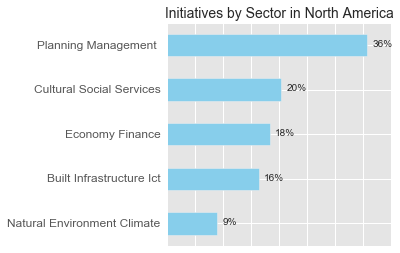

In [711]:
horizontalBarChart(northAmerica, prefix='Sector', title='Initiatives by Sector in North America', color='skyblue')

    barchart(northAmerica, prefix='Sub-Sector', title='Initiatives by Sub-Sector in North America', color='skyblue')

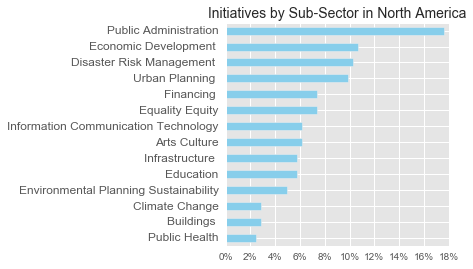

In [712]:
horizontalBarChart(northAmerica, prefix='Sub-Sector', title='Initiatives by Sub-Sector in North America', color='skyblue')

    barchart(northAmerica, prefix='Action Area', title='Initiatives by Action Area in North America', color='skyblue')

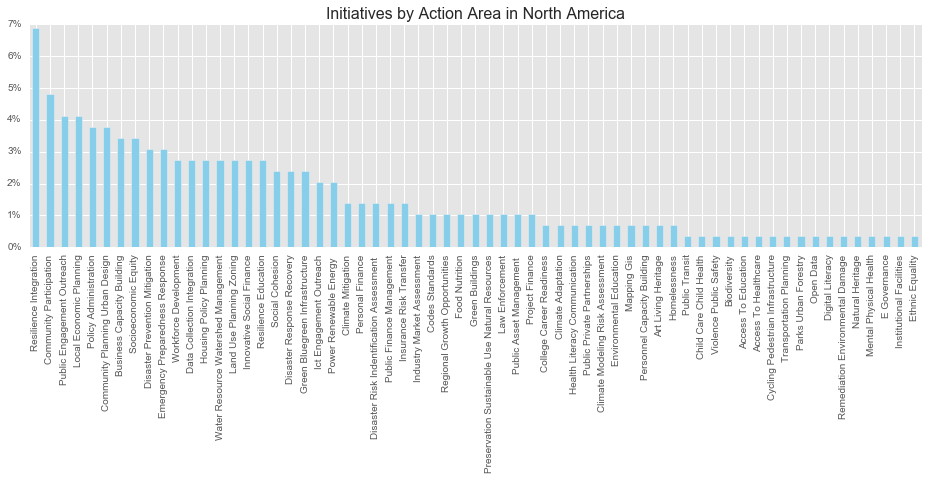

In [713]:
verticalBarChart(northAmerica, prefix='Action Area', title='Initiatives by Action Area in North America', color='skyblue')

    barchart(asiaPacific, prefix='Sector', title='Initiatives by Sector in Asia Pacific', color='salmon')

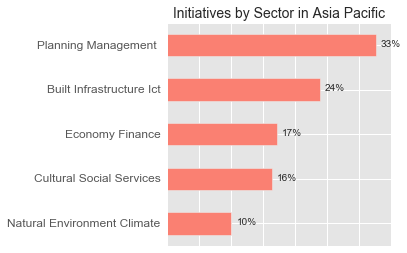

In [714]:
horizontalBarChart(asiaPacific, prefix='Sector', title='Initiatives by Sector in Asia Pacific', color='salmon')

    barchart(asiaPacific, prefix='Sub-Sector', title='Initiatives by Sub-Sector in Asia Pacific', color='salmon')

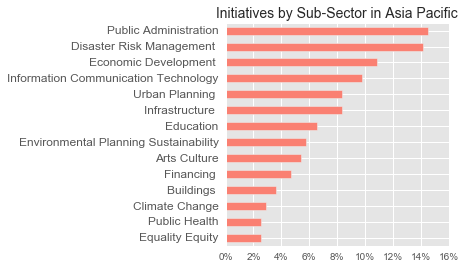

In [715]:
horizontalBarChart(asiaPacific, prefix='Sub-Sector', title='Initiatives by Sub-Sector in Asia Pacific', color='salmon')

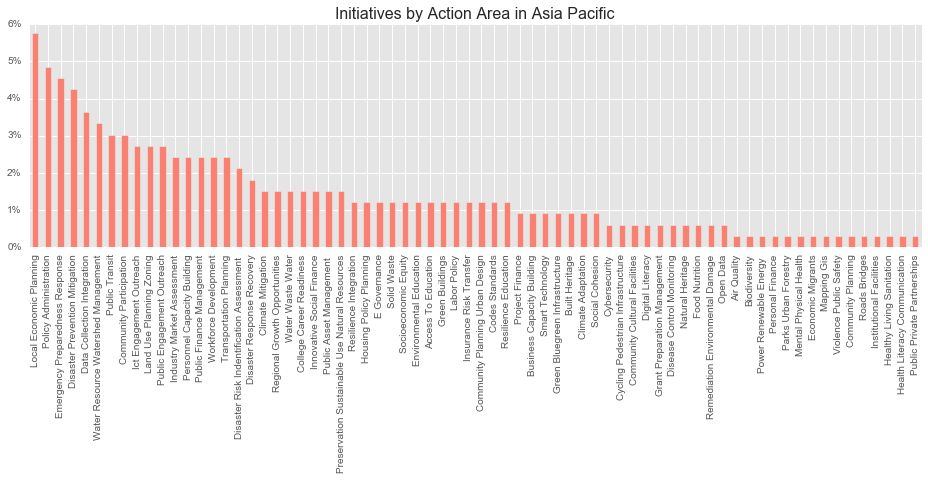

In [716]:
verticalBarChart(asiaPacific, prefix='Action Area', title='Initiatives by Action Area in Asia Pacific', color='salmon')

# Analyze the Delta between North American and Asian Action Areas

In [725]:
def percentTypes(df, prefix, ascending_bool=True):
    '''Prefix can be: Sector, Sub-Sector, Action Area'''    
    # Gather the columns starting with prefix
    prefix = prefix.replace(' ','')+'_'
    df = df[[col for col in list(df) if col.startswith(prefix)]]
    col_list= list(df)

    # Remove the nan column
    col_list.remove(prefix+'nan')

    # Remove prefix from column names
    df.columns = df.columns.str.replace(prefix,'')
    col_list = [i.replace(prefix,'') for i in col_list]
    
    # Replace '_' with ' ' and capitalize column names
    df.columns = [i.replace('_',' ').title() for i in df.columns]
    col_list = [i.replace('_',' ').title() for i in col_list]
    
    # Sum each column
    counts = df[col_list].sum(axis=0).sort_values(ascending=ascending_bool)

    percents = counts / counts.sum()

    return percents

In [731]:
northAmerica_percents = percentTypes(northAmerica,'Action Area',False)
northAmerica_percents.head()

Resilience Integration        0.068729
Community Participation       0.048110
Public Engagement Outreach    0.041237
Local Economic Planning       0.041237
Policy Administration         0.037801
dtype: float64

In [733]:
asiaPacific_percents = percentTypes(asiaPacific,'Action Area',False)
asiaPacific_percents.head()

Local Economic Planning            0.057576
Policy Administration              0.048485
Emergency Preparedness Response    0.045455
Disaster Prevention Mitigation     0.042424
Data Collection Integration        0.036364
dtype: float64

In [778]:
pcts = pd.concat([northAmerica_percents, asiaPacific_percents],axis=1)
pcts = pcts.rename(columns={0: "North America Percent", 1: "Asia Pacific Percent"})

In [779]:
pcts = pcts.fillna(value=0)
pcts.head()

,North America Percent,Asia Pacific Percent
Access To Education,0.003436,0.012121
Access To Healthcare,0.003436,0.000000
Air Quality,0.000000,0.003030
Art Living Heritage,0.006873,0.000000
Biodiversity,0.003436,0.003030


In [780]:
pcts['Delta'] = pcts['North America Percent'] - pcts['Asia Pacific Percent']

# dummy variable for positive deltas
pcts['positive'] = pcts['Delta'] > 0


In [781]:
pcts.head()

,North America Percent,Asia Pacific Percent,Delta,positive
Access To Education,0.003436,0.012121,-0.008685,False
Access To Healthcare,0.003436,0.000000,0.003436,True
Air Quality,0.000000,0.003030,-0.003030,False
Art Living Heritage,0.006873,0.000000,0.006873,True
Biodiversity,0.003436,0.003030,0.000406,True


In [782]:
pcts = pcts.sort_values('Delta', ascending=True)
pcts.head()

,North America Percent,Asia Pacific Percent,Delta,positive
Public Transit,0.003436,0.030303,-0.026867,False
Transportation Planning,0.003436,0.024242,-0.020806,False
Personnel Capacity Building,0.006873,0.024242,-0.017370,False
Local Economic Planning,0.041237,0.057576,-0.016339,False
Water Waste Water,0.000000,0.015152,-0.015152,False


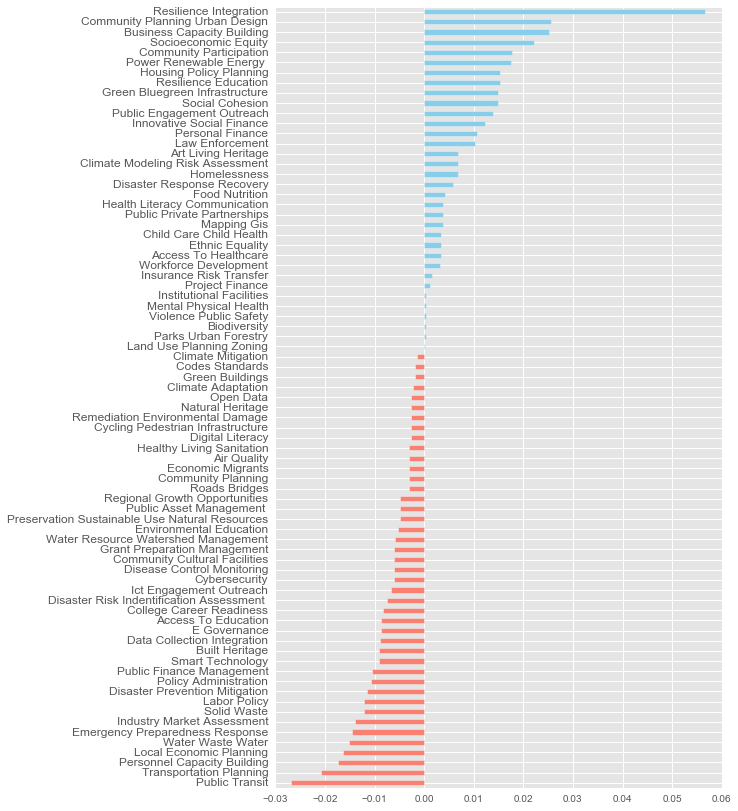

In [788]:
ax = pcts['Delta'].plot(kind='barh',figsize=(8,14), color=pcts.positive.map({True: 'skyblue', False: 'salmon'}))

vals = ax.get_yticklabels()
ax.set_yticklabels([x for x in vals], fontsize=12);